In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('EnglandWeather.csv')
df = pd.DataFrame(data)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


In [3]:
new = df['Formatted Date'].str.split(' ',n = 2,expand = True)
new

,0,1,2
0,2006-04-01,00:00:00.000,+0200
1,2006-04-01,01:00:00.000,+0200
2,2006-04-01,02:00:00.000,+0200
3,2006-04-01,03:00:00.000,+0200
4,2006-04-01,04:00:00.000,+0200
...,...,...,...
96448,2016-09-09,19:00:00.000,+0200
96449,2016-09-09,20:00:00.000,+0200
96450,2016-09-09,21:00:00.000,+0200
96451,2016-09-09,22:00:00.000,+0200


In [4]:
df = df.drop(columns = ['Formatted Date'])
df.insert(0,'Date',new[0],True)
df

,Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


In [5]:
df.sort_values(by = 'Date',inplace = True)
dfMean = df.groupby(pd.Grouper(key = 'Date'),as_index = False).mean()
dfMean

,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-01-01,3.873148,21.372750,1012.279167,0.818333
1,2006-01-02,5.418519,17.551683,1010.131667,0.844583
2,2006-01-03,2.319444,8.417617,1020.805000,0.898333
3,2006-01-04,2.274074,11.579925,981.826667,0.905417
4,2006-01-05,2.698148,9.515100,935.988333,0.948333
...,...,...,...,...,...
4013,2016-12-27,0.280324,10.980200,1020.304583,0.890000
4014,2016-12-28,0.224306,10.969467,1020.334583,0.890000
4015,2016-12-29,0.169676,10.892992,1020.365833,0.889583
4016,2016-12-30,0.119444,10.806454,1020.395000,0.889167


In [7]:
df1 = pd.DataFrame(dfMean,columns = ['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity'])
df1

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,3.873148,21.372750,1012.279167,0.818333
1,5.418519,17.551683,1010.131667,0.844583
2,2.319444,8.417617,1020.805000,0.898333
3,2.274074,11.579925,981.826667,0.905417
4,2.698148,9.515100,935.988333,0.948333
...,...,...,...,...
4013,0.280324,10.980200,1020.304583,0.890000
4014,0.224306,10.969467,1020.334583,0.890000
4015,0.169676,10.892992,1020.365833,0.889583
4016,0.119444,10.806454,1020.395000,0.889167


In [8]:
df1.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,4018.000000,4018.000000,4018.000000,4018.000000
mean,11.930135,10.812832,1003.233274,0.734882
std,8.778866,5.003314,71.325790,0.134333
min,-15.773611,1.245067,327.756800,0.297917
25%,5.046123,7.176575,1010.859167,0.632500
50%,12.245833,9.950806,1015.985208,0.743333
75%,19.269850,13.345894,1020.551979,0.842500
max,30.531481,36.002954,1043.574167,0.995000


In [9]:
df1.dropna()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,3.873148,21.372750,1012.279167,0.818333
1,5.418519,17.551683,1010.131667,0.844583
2,2.319444,8.417617,1020.805000,0.898333
3,2.274074,11.579925,981.826667,0.905417
4,2.698148,9.515100,935.988333,0.948333
...,...,...,...,...
4013,0.280324,10.980200,1020.304583,0.890000
4014,0.224306,10.969467,1020.334583,0.890000
4015,0.169676,10.892992,1020.365833,0.889583
4016,0.119444,10.806454,1020.395000,0.889167


In [10]:
df1.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,4018.000000,4018.000000,4018.000000,4018.000000
mean,11.930135,10.812832,1003.233274,0.734882
std,8.778866,5.003314,71.325790,0.134333
min,-15.773611,1.245067,327.756800,0.297917
25%,5.046123,7.176575,1010.859167,0.632500
50%,12.245833,9.950806,1015.985208,0.743333
75%,19.269850,13.345894,1020.551979,0.842500
max,30.531481,36.002954,1043.574167,0.995000


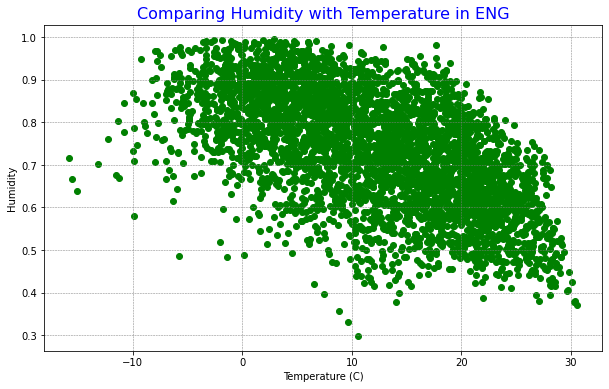

In [203]:
plt.figure(figsize = (10,6))
plt.title('Comparing Humidity with Temperature in ENG',fontsize = 16, loc = 'center',color = 'b')
plt.scatter(df1['Temperature (C)'],df1['Humidity'],color='g')
plt.xlabel ('Temperature (C)')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)

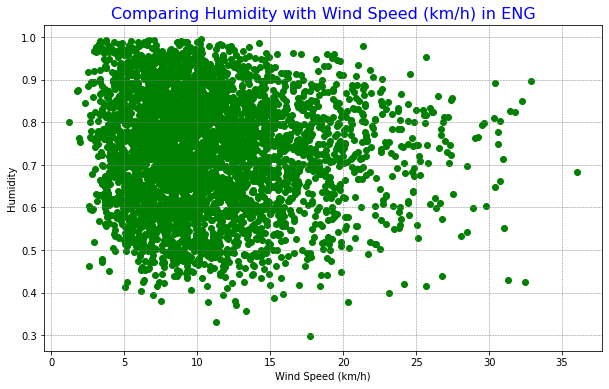

In [204]:
plt.figure(figsize = (10,6))
plt.title('Comparing Humidity with Wind Speed (km/h) in ENG',fontsize = 16 , loc = 'center',color = 'b')
plt.scatter(df1['Wind Speed (km/h)'],df1['Humidity'],color='g')
plt.xlabel ('Wind Speed (km/h)')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)

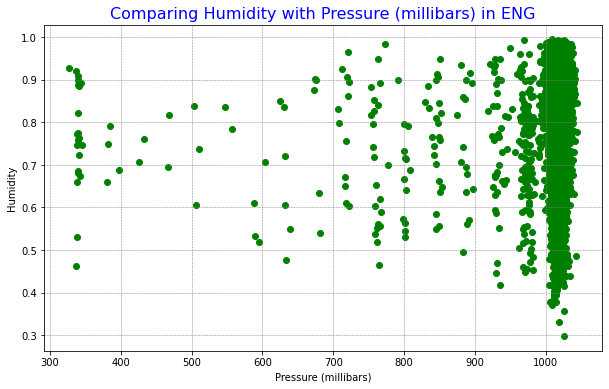

In [205]:
plt.figure(figsize = (10,6))
plt.title('Comparing Humidity with Pressure (millibars) in ENG',fontsize = 16 , loc = 'center',color = 'b')
plt.scatter(df1['Pressure (millibars)'],df1['Humidity'],color='g')
plt.xlabel ('Pressure (millibars)')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)

In [11]:


#dfMean['Date']=dfMean['Date'].dt.date
dfMean['year'] = pd.to_datetime(dfMean.Date,utc=True).dt.year
#dfMean['date1'] = pd.to_datetime(dfMean.date,utc=True).dt.date
dfMean['month'] = pd.to_datetime(dfMean.Date,utc=True).dt.month
dfMean

,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,month
0,2006-01-01,3.873148,21.372750,1012.279167,0.818333,2006,1
1,2006-01-02,5.418519,17.551683,1010.131667,0.844583,2006,1
2,2006-01-03,2.319444,8.417617,1020.805000,0.898333,2006,1
3,2006-01-04,2.274074,11.579925,981.826667,0.905417,2006,1
4,2006-01-05,2.698148,9.515100,935.988333,0.948333,2006,1
...,...,...,...,...,...,...,...
4013,2016-12-27,0.280324,10.980200,1020.304583,0.890000,2016,12
4014,2016-12-28,0.224306,10.969467,1020.334583,0.890000,2016,12
4015,2016-12-29,0.169676,10.892992,1020.365833,0.889583,2016,12
4016,2016-12-30,0.119444,10.806454,1020.395000,0.889167,2016,12


In [12]:
dfMean['Date'] = pd.to_datetime(dfMean['Date'])
df['Date']

dfMean['month_name'] = dfMean['Date'].dt.month_name()
dfMean['month_name']

0        January
1        January
2        January
3        January
4        January
          ...   
4013    December
4014    December
4015    December
4016    December
4017    December
Name: month_name, Length: 4018, dtype: object

In [13]:
dfMean['month_name'] = pd.Categorical(dfMean['month_name'],['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
dfMean.sort_values(by='month_name' , inplace = True)
dfMean

,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,month,month_name
0,2006-01-01,3.873148,21.372750,1012.279167,0.818333,2006,1,January
3311,2015-01-25,2.128472,11.623529,1015.403333,0.932083,2015,1,January
3310,2015-01-24,4.256944,13.248958,1009.382917,0.924167,2015,1,January
3309,2015-01-23,5.938426,13.524671,1010.961667,0.957083,2015,1,January
3308,2015-01-22,6.404167,7.422100,1015.235833,0.956250,2015,1,January
...,...,...,...,...,...,...,...,...
337,2006-12-04,7.982639,10.893662,1015.646667,0.826667,2006,12,December
338,2006-12-05,7.433565,8.005725,1018.180833,0.947917,2006,12,December
339,2006-12-06,8.172685,14.241121,1016.716250,0.878750,2006,12,December
3257,2014-12-02,3.309491,9.400387,1014.121250,0.895417,2014,12,December


In [14]:
dfMean.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,month
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,11.930135,10.812832,1003.233274,0.734882,2011.000747,6.522648
std,8.778866,5.003314,71.325790,0.134333,3.162868,3.449210
min,-15.773611,1.245067,327.756800,0.297917,2006.000000,1.000000
25%,5.046123,7.176575,1010.859167,0.632500,2008.000000,4.000000
50%,12.245833,9.950806,1015.985208,0.743333,2011.000000,7.000000
75%,19.269850,13.345894,1020.551979,0.842500,2014.000000,10.000000
max,30.531481,36.002954,1043.574167,0.995000,2016.000000,12.000000


In [15]:
dfMean.to_csv('ENG.csv',index = False )
#df.sort_values(by = 'Date',inplace = True)


In [16]:
data1 = pd.read_csv('ENG.csv')
data1

,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,month,month_name
0,2006-01-01,3.873148,21.372750,1012.279167,0.818333,2006,1,January
1,2015-01-25,2.128472,11.623529,1015.403333,0.932083,2015,1,January
2,2015-01-24,4.256944,13.248958,1009.382917,0.924167,2015,1,January
3,2015-01-23,5.938426,13.524671,1010.961667,0.957083,2015,1,January
4,2015-01-22,6.404167,7.422100,1015.235833,0.956250,2015,1,January
...,...,...,...,...,...,...,...,...
4013,2006-12-04,7.982639,10.893662,1015.646667,0.826667,2006,12,December
4014,2006-12-05,7.433565,8.005725,1018.180833,0.947917,2006,12,December
4015,2006-12-06,8.172685,14.241121,1016.716250,0.878750,2006,12,December
4016,2014-12-02,3.309491,9.400388,1014.121250,0.895417,2014,12,December


In [17]:
df2 = data1[data1['year'] == 2016]
df2

,Date,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,month,month_name
89,2016-01-29,2.878009,4.770967,1029.237500,0.973750,2016,1,January
90,2016-01-28,5.349074,10.720588,1025.373750,0.915833,2016,1,January
91,2016-01-27,2.360648,8.871771,1027.286250,0.987500,2016,1,January
92,2016-01-26,2.543056,5.990542,1028.800417,0.980417,2016,1,January
104,2016-01-25,0.098380,10.865488,1031.637083,0.937083,2016,1,January
...,...,...,...,...,...,...,...,...
3778,2016-12-11,1.623148,11.051979,1019.797500,0.887917,2016,12,December
3779,2016-12-10,1.733333,11.037221,1019.763750,0.887083,2016,12,December
3780,2016-12-09,1.845139,11.029842,1019.727083,0.886667,2016,12,December
3820,2016-12-30,0.119444,10.806454,1020.395000,0.889167,2016,12,December


In [18]:
df2.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,month
count,366.000000,366.000000,366.000000,366.000000,366.0,366.000000
mean,11.985344,10.702999,1015.161128,0.760883,2016.0,6.513661
std,8.295864,4.256847,16.211637,0.117986,0.0,3.455958
min,-7.652778,1.913217,752.847500,0.484583,2016.0,1.000000
25%,5.624942,7.838184,1012.800417,0.671875,2016.0,4.000000
50%,10.977431,10.694090,1016.972292,0.774792,2016.0,7.000000
75%,19.847106,12.528651,1019.856354,0.864479,2016.0,9.750000
max,28.379861,27.189546,1036.178333,0.987500,2016.0,12.000000


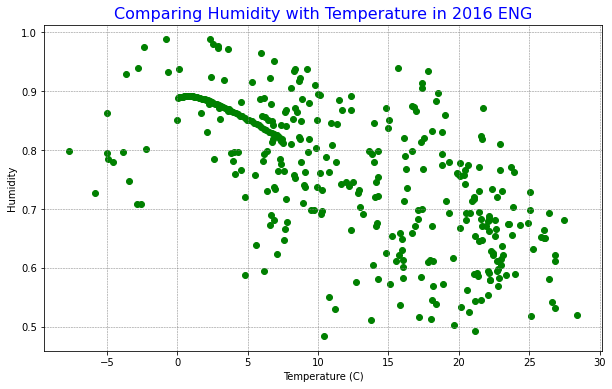

In [170]:
plt.figure(figsize = (10,6))
plt.title('Comparing Humidity with Temperature in 2016 ENG',fontsize = 16 , loc = 'center',color = 'b')
plt.scatter(df2['Temperature (C)'],df2['Humidity'],color='g')
plt.xlabel ('Temperature (C)')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)


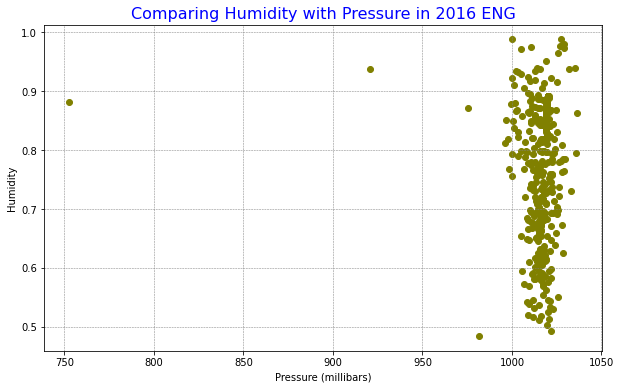

In [171]:
plt.figure(figsize = (10,6))
plt.title('Comparing Humidity with Pressure in 2016 ENG',fontsize = 16 , loc = 'center',color = 'b')
plt.scatter(df2['Pressure (millibars)'],df2['Humidity'],color='olive')
plt.xlabel ('Pressure (millibars)')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)


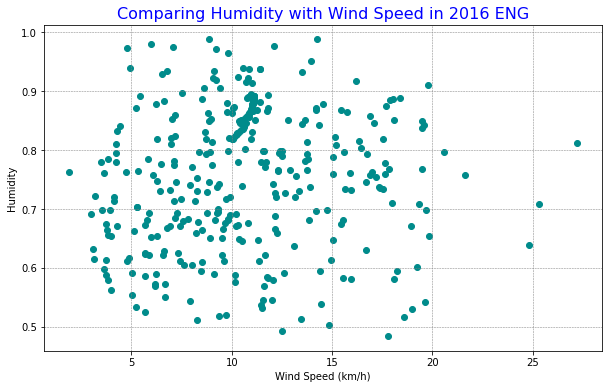

In [172]:
plt.figure(figsize = (10,6))
plt.title('Comparing Humidity with Wind Speed in 2016 ENG',fontsize = 16 , loc = 'center',color = 'b')
plt.scatter(df2['Wind Speed (km/h)'],df2['Humidity'],color='darkcyan')
plt.xlabel ('Wind Speed (km/h)')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)

In [19]:
df2['month_name'] = pd.Categorical(df2['month_name'],['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
df2.sort_values(by='month_name' , inplace = True)

c:\users\e_koliji\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\e_koliji\appdata\local\programs\python\python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


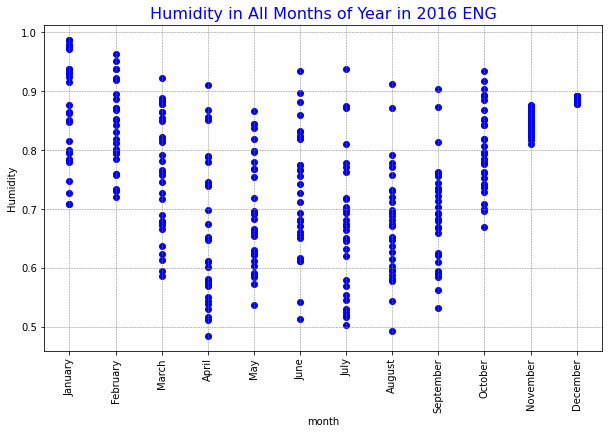

In [174]:
plt.figure(figsize = (10,6))
plt.title('Humidity in All Months of Year in 2016 ENG',fontsize = 16 , loc = 'center',color = 'b')
plt.scatter(df2['month_name'],df2['Humidity'],color='b')
plt.xlabel ('month')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)
plt.xticks(rotation = 90)
plt.show()

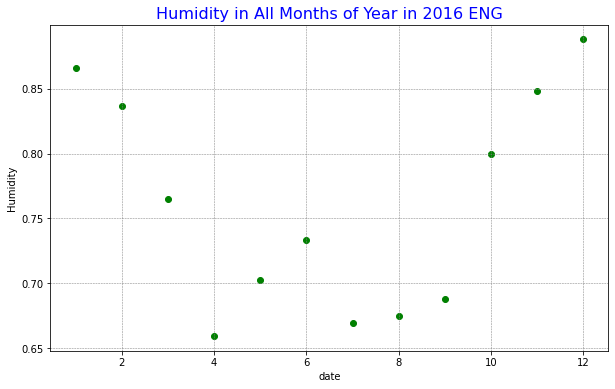

In [25]:
#df2 = data1[data1['year'] == 2016]
#df['date1'] = pd.to_datetime(df.date,utc=True).dt.date
Df = df2.sort_values(by = 'Date')
DataMean = Df.groupby(pd.Grouper(key = 'month'), as_index = False).mean()
plt.figure(figsize = (10,6))
plt.title('Humidity in All Months of Year in 2016 ENG',fontsize = 16 , loc = 'center',color = 'b')
plt.scatter(DataMean['month'],DataMean['Humidity'],color='g')
plt.xlabel ('date')
plt.ylabel ('Humidity')
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)


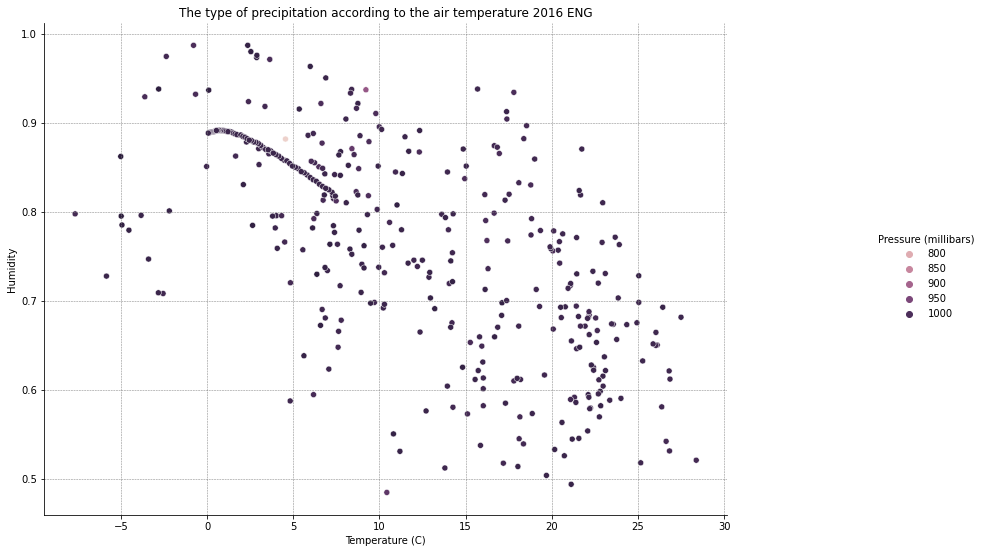

In [178]:

snsx = sns.relplot(x = 'Temperature (C)' , y = 'Humidity',hue = 'Pressure (millibars)' ,data = df2)
snsx.set(xlabel='Temperature (C)', ylabel='Humidity'
       , title='The type of precipitation according to the air temperature 2016 ENG'
      )
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)
plt.gcf().set_size_inches(15, 8)

In [181]:
df6 = dfMean[(dfMean['year'] == 2007)]# & (df['month_name'] == 'March')]
df6 = df6 [df6['month'] == 2]#.describe()
df6.describe()


,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,month
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,4.864881,12.479632,1010.738080,0.815193,2007.0,2.0
std,2.244044,6.426217,16.027748,0.086772,0.0,0.0
min,0.964352,3.071746,965.610833,0.600833,2007.0,2.0
25%,2.565625,8.432543,1008.896875,0.770000,2007.0,2.0
50%,5.102778,10.394898,1014.947708,0.825000,2007.0,2.0
75%,6.827083,14.182423,1018.537187,0.867917,2007.0,2.0
max,8.518056,30.967008,1027.949167,0.966250,2007.0,2.0


In [27]:

df5 = pd.pivot_table(dfMean, values='Humidity', columns='year',
   index='month_name',aggfunc=np.mean)
df5

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month_name,,,,,,,,,,,
January,0.834651,0.813589,0.819570,0.867581,0.875981,0.922030,0.797581,0.883306,0.846371,0.831384,0.865914
February,0.843393,0.815193,0.682859,0.821161,0.851845,0.854137,0.762744,0.869107,0.812307,0.803438,0.836853
March,0.778532,0.713653,0.668368,0.696784,0.669738,0.782785,0.536536,0.810257,0.640476,0.669745,0.765213
April,0.729528,0.536917,0.692958,0.567806,0.707278,0.592111,0.650153,0.678194,0.690708,0.547486,0.659319
May,0.720968,0.652715,0.663145,0.596868,0.772487,0.687957,0.672191,0.734395,0.698978,0.702298,0.702567
June,0.746972,0.616889,0.679625,0.675681,0.778750,0.677347,0.622736,0.762486,0.602167,0.655264,0.733250
July,0.656384,0.491532,0.616492,0.600887,0.754973,0.707446,0.580618,0.636290,0.699205,0.622997,0.669556
August,0.761129,0.562823,0.552231,0.596895,0.743522,0.631667,0.500914,0.596089,0.708454,0.659919,0.674516
September,0.688931,0.682083,0.689986,0.596722,0.826847,0.611306,0.602375,0.691931,0.785194,0.713250,0.688069


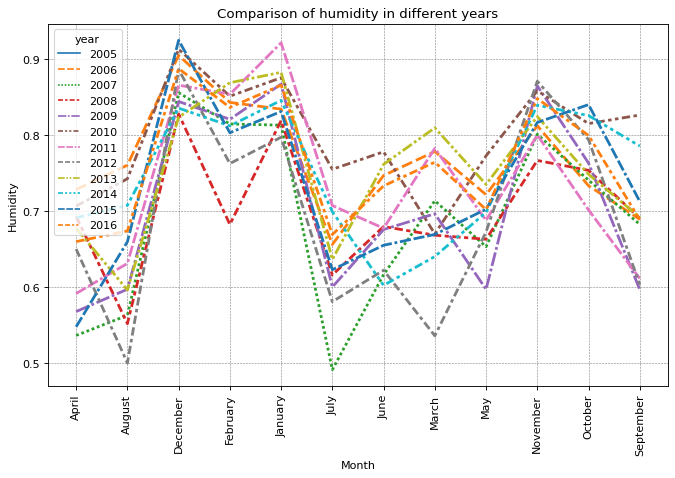

In [23]:
plt.figure(figsize=(10,6),dpi=80)
sns.lineplot(data=df5, palette="tab10", linewidth=2.5).set(
    title = 'Comparison of humidity in different years'
    ,xlabel='Month', ylabel='Humidity')
plt.xticks(rotation = 90)
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)

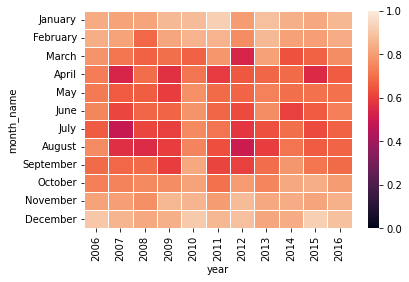

In [30]:
ax = sns.heatmap(df5, linewidths=.5,vmin=0, vmax=1)

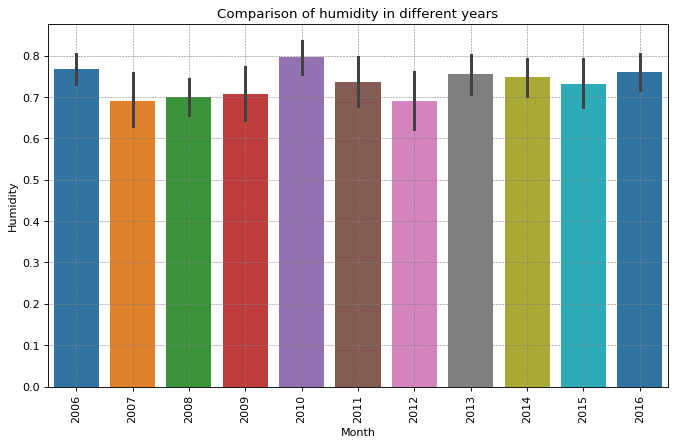

In [185]:
plt.figure(figsize=(10,6),dpi=80)
sns.barplot(data=df5, palette="tab10", linewidth=2.5).set(
    title = 'Comparison of humidity in different years'
    ,xlabel='Month', ylabel='Humidity')
plt.xticks(rotation = 90)
plt.grid(which = 'both' , color='gray',linestyle = '--' , linewidth = 0.5)